# Problem Statement: Predictive Modeling for Disease Diagnosis

# Background:
Healthcare professionals often rely on various diagnostic tests and biomarkers to assess an individual's
health status and diagnose diseases. In this scenario, we have access to a dataset containing multiple
health-related attributes such as cholesterol levels, blood cell counts, hormone levels, and other
physiological measurements. The dataset also includes information on whether the individual has been
diagnosed with a specific disease or not.

# Objective:
The objective of this project is to develop a predictive model that can accurately classify individuals into
diseased or non-diseased categories based on their health attributes. By leveraging machine learning
algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease
diagnosis and prognosis.


# Data Description:
The dataset consists of the following attributes:
1. Cholesterol: Level of cholesterol in the blood (mg/dL)
2. Hemoglobin: Protein in red blood cells carrying oxygen
3. Platelets: Blood cells aiding in clotting
4. White Blood Cells (WBC): Immune system cells fighting infections
5. Red Blood Cells (RBC): Cells carrying oxygen
6. Hematocrit: Percentage of blood volume occupied by RBC
7. Mean Corpuscular Volume (MCV): Average volume of RBC
8. Mean Corpuscular Hemoglobin (MCH): Average amount of hemoglobin in RBC
9. Mean Corpuscular Hemoglobin Concentration (MCHC): Average concentration of hemoglobin in
RBC
10. Insulin: Hormone regulating blood sugar levels
11. BMI (Body Mass Index): Measure of body fat based on height and weight
12. Systolic Blood Pressure (SBP): Pressure in arteries during heartbeats
13. Diastolic Blood Pressure (DBP): Pressure in arteries at rest between beats
14. Triglycerides: Type of fat found in blood (mg/dL)
15. HbA1c (Glycated Hemoglobin): Measure of average blood sugar levels over past 2-3 months
16. LDL (Low-Density Lipoprotein) Cholesterol: "Bad" cholesterol
17. HDL (High-Density Lipoprotein) Cholesterol: "Good" cholesterol
18. ALT (Alanine Aminotransferase): Liver enzyme
19. AST (Aspartate Aminotransferase): Enzyme found in liver and heart
20. Heart Rate: Number of heartbeats per minute (bpm)
21. Creatinine: Waste product produced by muscles and filtered by kidneys
22. Troponin: Protein released into bloodstream during heart muscle damage
23. C-reactive Protein (CRP): Marker of inflammation in the body
24. Disease: Binary indicator (1: Diseased, 0: Non-diseased)

# Target Variable:
Disease

# Load important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Shaheen\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("Train_data.csv")
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [4]:
df.shape

(2351, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

# statistical summary

In [6]:
df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


# check missing values

In [7]:
df.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

# check duplicate values

In [8]:
df.drop_duplicates(inplace=False)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.389399,0.462404,0.480595,0.228912,0.781088,0.889100,0.201787,0.298939,0.285184,0.669895,...,0.102180,0.701782,0.767014,0.749700,0.070974,0.932907,0.382647,0.483517,0.049015,Healthy
237,0.102006,0.061132,0.888312,0.994820,0.078491,0.981193,0.035297,0.849053,0.963235,0.938895,...,0.642012,0.564277,0.293284,0.101245,0.409581,0.645013,0.344796,0.294671,0.587726,Anemia
245,0.320138,0.442105,0.331686,0.171060,0.990786,0.992377,0.913721,0.880020,0.025514,0.931498,...,0.313360,0.551162,0.922278,0.485114,0.486317,0.519647,0.076333,0.073240,0.084155,Thalasse
259,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia


In [9]:
# Check the shape before removing duplicates
print("Original shape:", df.shape)

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Check the shape after removing duplicates
print("Shape after removing duplicates:", df_no_duplicates.shape)


Original shape: (2351, 25)
Shape after removing duplicates: (65, 25)


# unique values

In [10]:
df['White Blood Cells'].value_counts()

White Blood Cells
0.619331    51
0.129569    49
0.721064    47
0.231827    47
0.294538    46
            ..
0.112105    26
0.487405    25
0.990786    25
0.875773    23
0.734664    23
Name: count, Length: 65, dtype: int64

In [11]:
df['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

In [12]:
df['Disease'].value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

In [13]:
df['Heart Rate'].unique()

array([0.93948485, 0.66636811, 0.4317036 , 0.22575553, 0.84141182,
       0.89427339, 0.6121878 , 0.65906854, 0.63914774, 0.74346222,
       0.99687281, 0.98289311, 0.69331271, 0.59954229, 0.8933968 ,
       0.64695134, 0.59130264, 0.29883728, 0.89103745, 0.63662855,
       0.97919154, 0.51856742, 0.91846808, 0.72763311, 0.65662907,
       0.13959312, 0.82512201, 0.29550169, 0.45486981, 0.89820881,
       0.31037466, 0.11455035, 0.3391247 , 0.40389029, 0.41303743,
       0.26275295, 0.66118909, 0.92816086, 0.61086034, 0.79980979,
       0.26982663, 0.63612532, 0.40378467, 0.51084583, 0.43328382,
       0.30637956, 0.55264378, 0.54413641, 0.98578632, 0.35264676,
       0.30423659, 0.87105312, 0.24414081, 0.32699811, 0.46636354,
       0.33534614, 0.15394039, 0.72823935, 0.80066578, 0.20709751,
       0.93290668, 0.64501323, 0.51964705, 0.34472783, 0.88495541])

# count plot:
## Visualize the Unique counts
Yes, you can visualize the unique values present in the data. For this, we will be using the seaborn library. You have to call the sns.countlot() function and specify the variable to plot the count plot.

C:\Users\Shaheen\AppData\Local\Temp\ipykernel_13740\69557842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Disease'], palette=colors)


<Axes: xlabel='count', ylabel='Disease'>

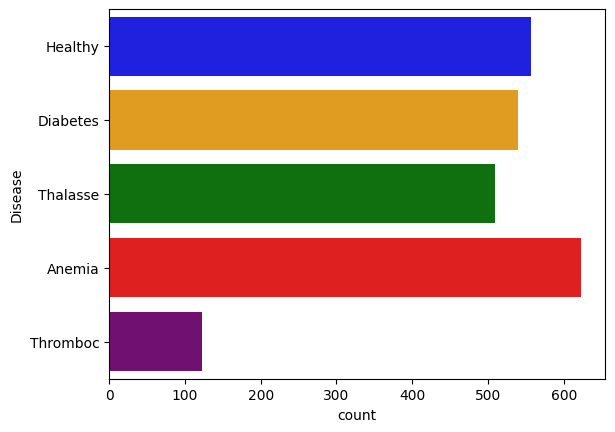

In [14]:
colors = ["blue", "orange", "green", "red", "purple"]
sns.countplot(df['Disease'], palette=colors)

C:\Users\Shaheen\AppData\Local\Temp\ipykernel_13740\2933689668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['HDL Cholesterol'].isin(top_counts.index)], x='HDL Cholesterol', palette=colors)


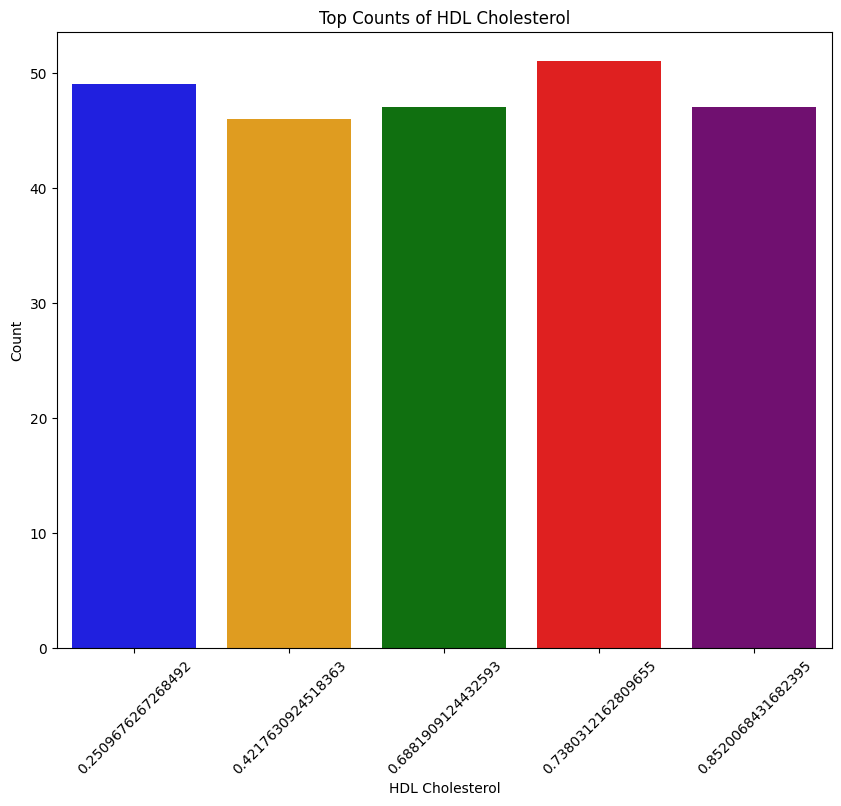

In [15]:
plt.figure(figsize=(10,8))
top_counts = df['HDL Cholesterol'].value_counts().head()

colors = ["blue", "orange", "green", "red", "purple"]
sns.countplot(data=df[df['HDL Cholesterol'].isin(top_counts.index)], x='HDL Cholesterol', palette=colors)
# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.xlabel('HDL Cholesterol')
plt.ylabel('Count')
plt.title('Top Counts of HDL Cholesterol')
plt.show()

# Handling Oulier using box plot
Handling the outliers in the data, i.e. the extreme values in the data. We can find the outliers in our data using a Boxplot.

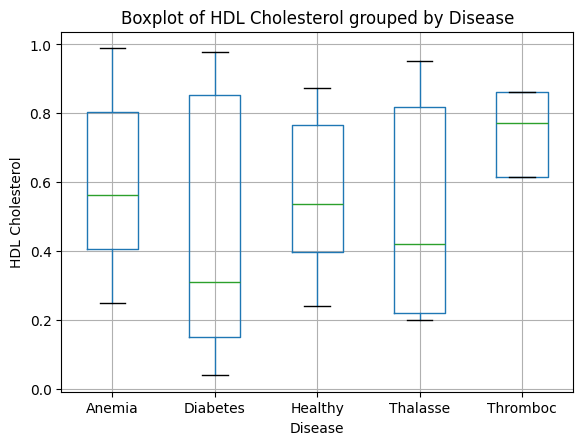

In [16]:
# Select a numerical column for comparison
numerical_column = 'HDL Cholesterol'

# Create a boxplot grouped by 'Disease'
df.boxplot(column=numerical_column, by='Disease')
plt.ylabel(numerical_column)
plt.title('Boxplot of {} grouped by Disease'.format(numerical_column))
plt.suptitle('')  # Remove pandas' default title
plt.show()

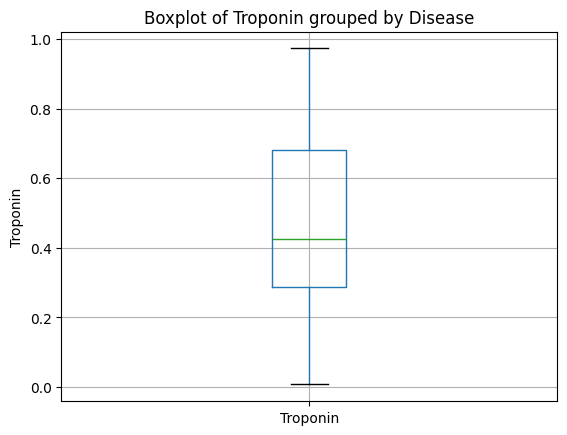

In [17]:
# Select a numerical column for comparison
numerical_column = 'Troponin'

# Create a boxplot grouped by 'Disease'
df.boxplot(column=numerical_column)
plt.ylabel(numerical_column)
plt.title('Boxplot of {} grouped by Disease'.format(numerical_column))
plt.suptitle('')  # Remove pandas' default title
plt.show()

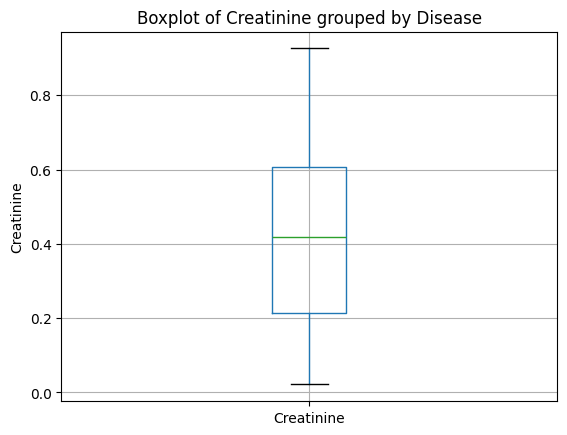

In [18]:
# Select a numerical column for comparison
numerical_column = 'Creatinine'

# Create a boxplot grouped by 'Disease'
df.boxplot(column=numerical_column)
plt.ylabel(numerical_column)
plt.title('Boxplot of {} grouped by Disease'.format(numerical_column))
plt.suptitle('')  # Remove pandas' default title
plt.show()

There is no any outlier in variables.

# Histogram plot

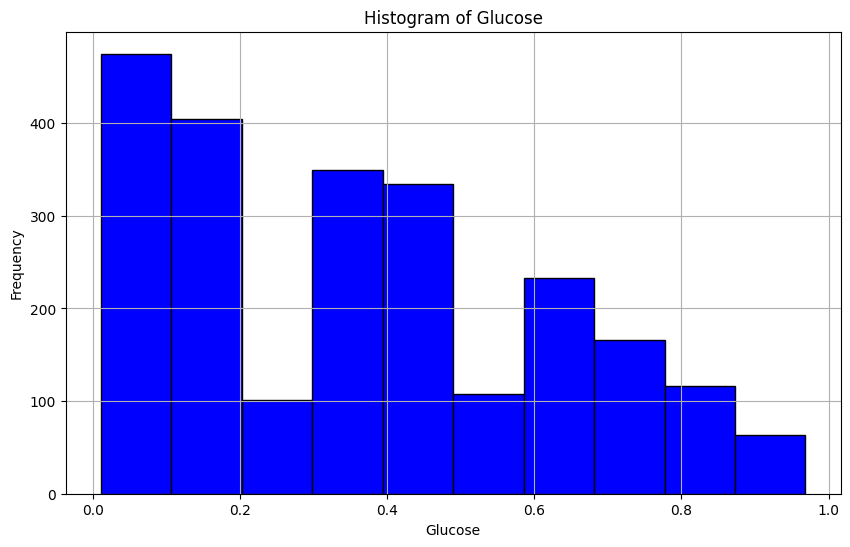

In [19]:
# Plot the histogram of 'BMI_squared'
plt.figure(figsize=(10, 6))
plt.hist(df['Glucose'], color='blue', edgecolor='black')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose')
plt.grid(True)
plt.show()

# Quantile statistics
Minimum = 0.01
median	= 0.35172218
Maximum	= 0.96846021
Mean	= 0.36282773
Skewness	= 0.41454589
Interquartile range (IQR)	= 0.45307996

##### Cholesterol: Level of cholesterol in the blood (mg/dL)

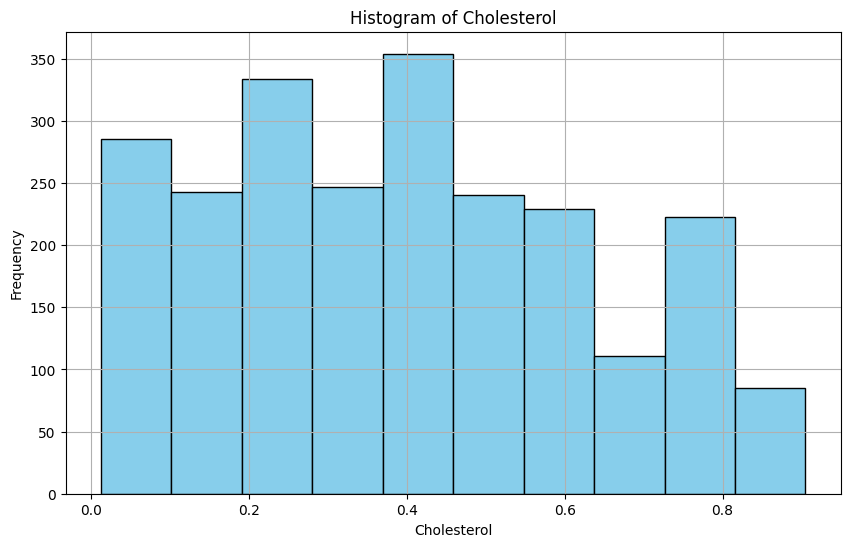

In [20]:
# Plot the histogram of 'Cholesterol'
plt.figure(figsize=(10, 6))
plt.hist(df['Cholesterol'], color='skyblue', edgecolor='black')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol')
plt.grid(True)
plt.show()

Mean	= 0.39364812
Maximum	= 0.90502642
Minimum	= 0.012139386

#### Hemoglobin: Protein in red blood cells carrying oxygen

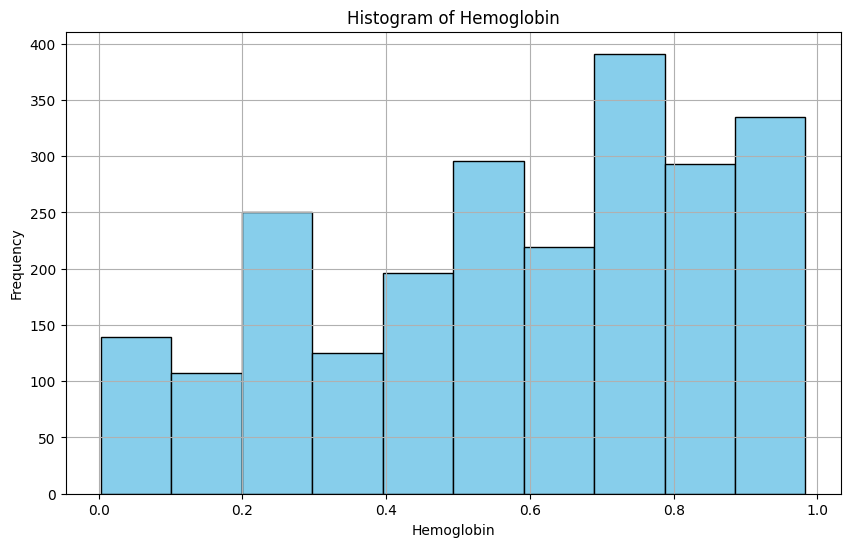

In [21]:
# Plot the histogram of 'BMI_squared'
plt.figure(figsize=(10, 6))
plt.hist(df['Hemoglobin'], color='skyblue', edgecolor='black')
plt.xlabel('Hemoglobin')
plt.ylabel('Frequency')
plt.title('Histogram of Hemoglobin')
plt.grid(True)
plt.show()

##### white and red blood cells using histogram plot

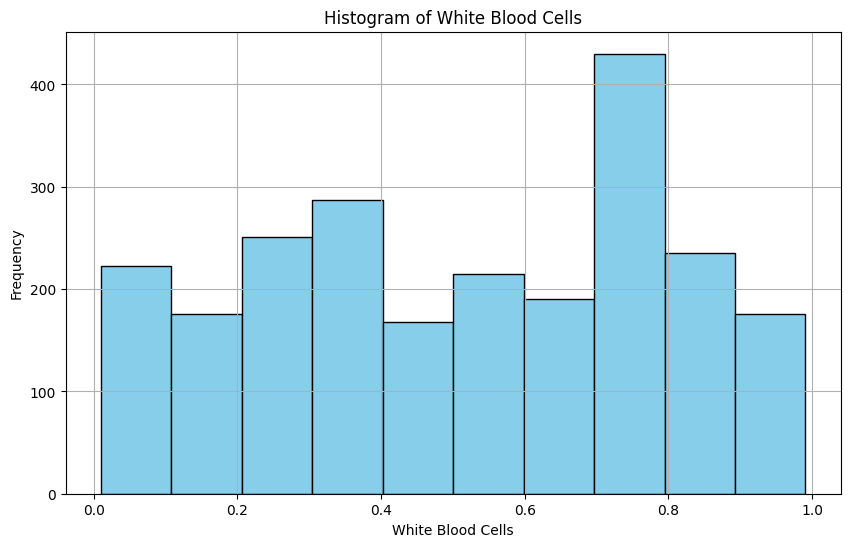

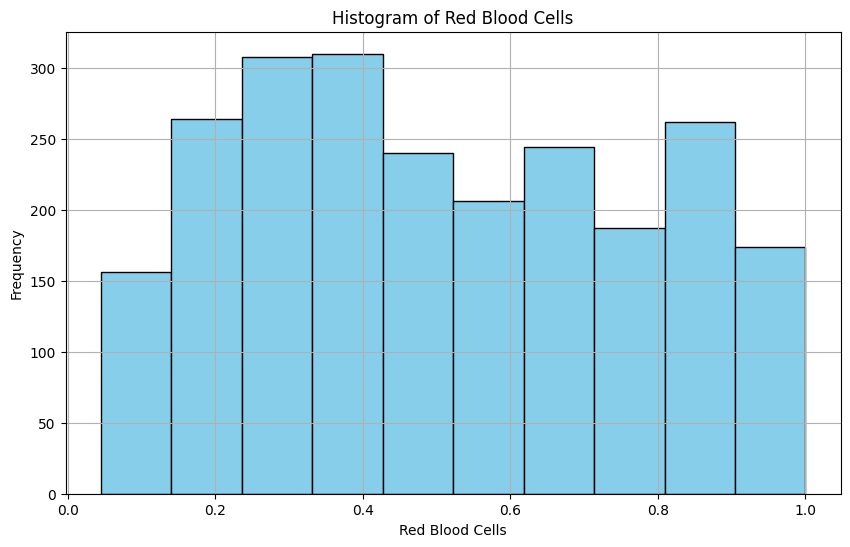

In [22]:
# Plot the histogram of 'BMI_squared'
plt.figure(figsize=(10, 6))
plt.hist(df['White Blood Cells'], color='skyblue', edgecolor='black')
plt.xlabel('White Blood Cells')
plt.ylabel('Frequency')
plt.title('Histogram of White Blood Cells')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Red Blood Cells'], color='skyblue', edgecolor='black')
plt.xlabel('Red Blood Cells')
plt.ylabel('Frequency')
plt.title('Histogram of Red Blood Cells')
plt.grid(True)
plt.show()

# White blood cells
Minimum white vlood cells are 0.010138508
Maximum white vlood cells are 0.9907857

# Red blood cells
Minimum white vlood cells are 0.044565078
Maximum white vlood cells are 1

# Scattor Plot
White Blood Cells (WBC): Immune system cells fighting infections

C:\Users\Shaheen\AppData\Local\Temp\ipykernel_13740\3449847301.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['White Blood Cells'], df['Platelets'], cmap='coolwarm', alpha=0.5)


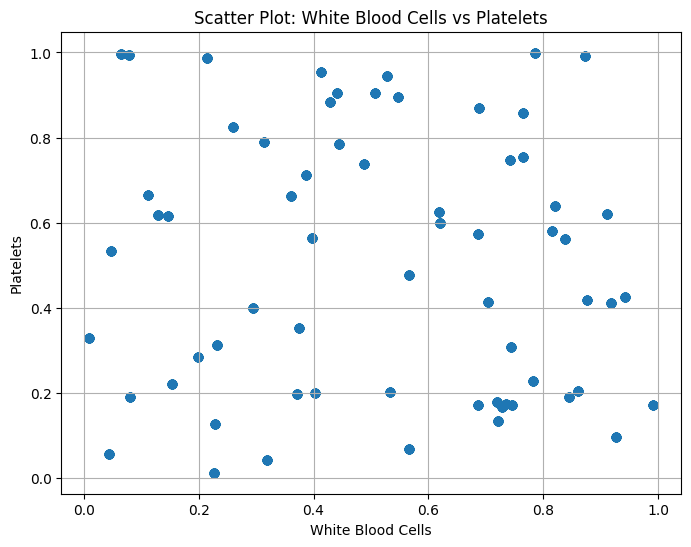

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['White Blood Cells'], df['Platelets'], cmap='coolwarm', alpha=0.5)
plt.title('Scatter Plot: White Blood Cells vs Platelets')
plt.xlabel('White Blood Cells')
plt.ylabel('Platelets')
plt.grid(True)

plt.show()

##### BMI (Body Mass Index): Measure of body fat based on height and weight

C:\Users\Shaheen\AppData\Local\Temp\ipykernel_13740\2589482697.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['BMI'], df['Insulin'], cmap='coolwarm', alpha=0.5)


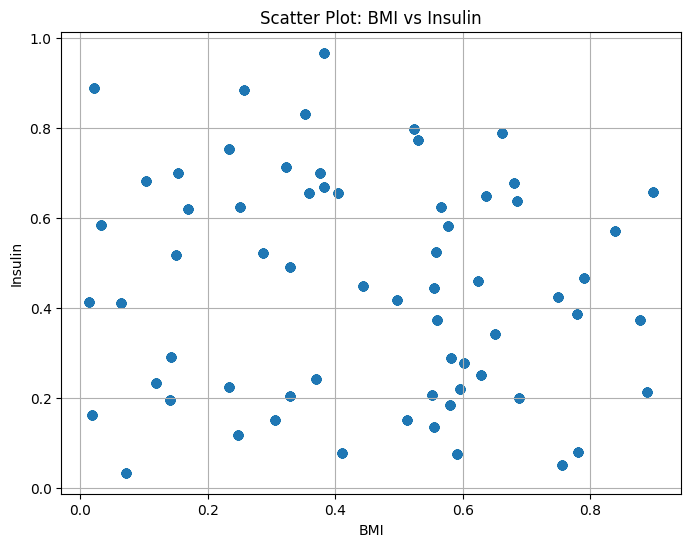

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI'], df['Insulin'], cmap='coolwarm', alpha=0.5)
plt.title('Scatter Plot: BMI vs Insulin')
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.grid(True)

plt.show()

# check unique values of HbA1c column

In [25]:
df['HbA1c'].unique()

array([0.50266478, 0.85680991, 0.46679526, 0.01625564, 0.42943127,
       0.38946078, 0.44685354, 0.67318805, 0.02262097, 0.36752011,
       0.57055334, 0.18875007, 0.55438443, 0.6462057 , 0.73854249,
       0.53188117, 0.18879175, 0.07986473, 0.46637517, 0.02674726,
       0.4895137 , 0.75566015, 0.12025149, 0.79897006, 0.60135547,
       0.85353776, 0.79546882, 0.57846068, 0.46170119, 0.44707279,
       0.7756658 , 0.06476153, 0.49118505, 0.14884516, 0.43038932,
       0.85345632, 0.31123633, 0.53362722, 0.76443031, 0.69919818,
       0.86509193, 0.67066485, 0.53779928, 0.02501023, 0.23795961,
       0.79692217, 0.70880822, 0.20622291, 0.48452521, 0.459586  ,
       0.13300148, 0.65251361, 0.19300963, 0.3933831 , 0.50818159,
       0.73177543, 0.02901486, 0.1020603 , 0.15117266, 0.11102957,
       0.10218033, 0.642012  , 0.31335981, 0.14173828, 0.95021811])

#### HbA1c (Glycated Hemoglobin): Measure of average blood sugar levels

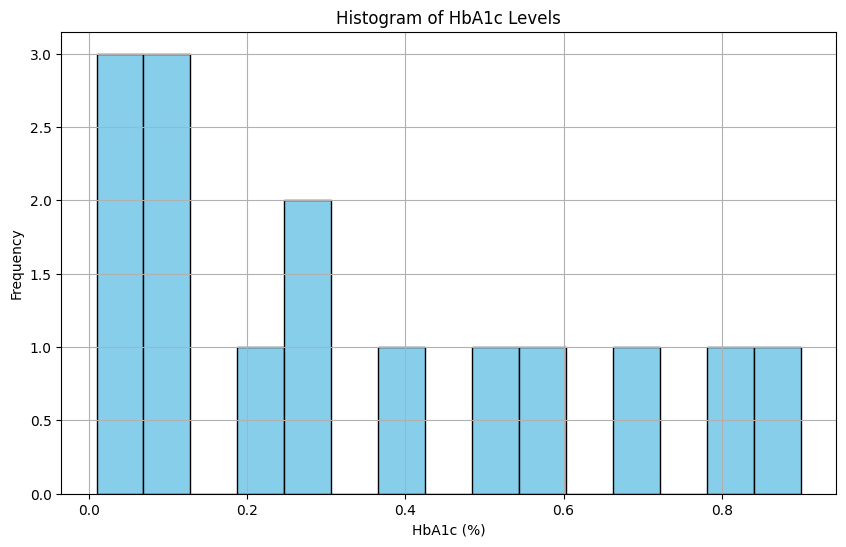

In [26]:
# Sample data (replace this with your actual data)
hba1c_data = [0.5, 0.8, 0.4, 0.01, 0.3, 0.6, 0.02, 0.3, 0.1, 0.7, 0.07, 0.06, 0.2, 0.9, 0.1]  # HbA1c levels for a sample

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(hba1c_data, bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of HbA1c Levels')
plt.xlabel('HbA1c (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# check unique values of AST  (Aspartate Aminotransferase): Enzyme found in liver and heart, column

In [27]:
df['AST'].unique()

array([0.61082651, 0.3442609 , 0.50691816, 0.59414785, 0.56711493,
       0.11999378, 0.23388981, 0.3224858 , 0.41717018, 0.31798367,
       0.29098431, 0.0995381 , 0.403087  , 0.40476063, 0.71042749,
       0.61985415, 0.99445995, 0.71463165, 0.15297665, 0.61618101,
       0.67741541, 0.44349757, 0.63494718, 0.76770661, 0.73410706,
       0.23637321, 0.01301255, 0.4888462 , 0.1894246 , 0.76893388,
       0.36459684, 0.08367186, 0.57090166, 0.23965907, 0.54483783,
       0.84937941, 0.57497525, 0.61167368, 0.04302088, 0.02487184,
       0.60222788, 0.8858123 , 0.5662151 , 0.07634336, 0.56599589,
       0.15227562, 0.46908524, 0.5913137 , 0.33575299, 0.17089377,
       0.55819112, 0.08049365, 0.24927653, 0.4670273 , 0.90087668,
       0.6208683 , 0.80574624, 0.26449035, 0.16316071, 0.51482923,
       0.07097375, 0.40958118, 0.48631743, 0.38719731, 0.70080021])

# Line plot

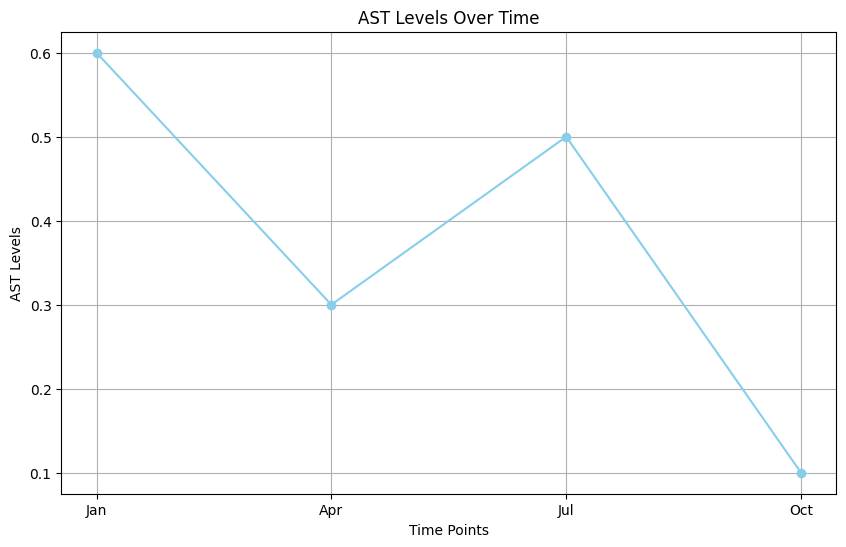

In [28]:
# Sample data (replace this with your actual data)
time_points = ['Jan', 'Apr', 'Jul', 'Oct']
ast_levels = [0.6, 0.3, 0.5, 0.1]  # AST levels at each time point (adjusted to match time_points)

# Plot line plot
plt.figure(figsize=(10, 6))
plt.plot(time_points, ast_levels, marker='o', color='skyblue', linestyle='-')
plt.title('AST Levels Over Time')
plt.xlabel('Time Points')
plt.ylabel('AST Levels')
plt.grid(True)
plt.show()


AST levels are measured at specific time points, and these time points are being used as the x-axis values in the line plot. Each element in the time_points list corresponds to a specific time point, and the AST levels at those time points are plotted accordingly.

# pie chart for checking Disease percentage

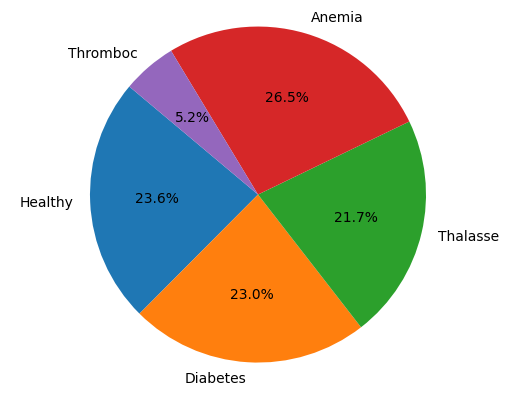

In [29]:
# Data to plot
labels = ['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc']
sizes = [556, 540, 509, 623, 123, ]  # Percentage distribution

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# check percentage of white blood cells

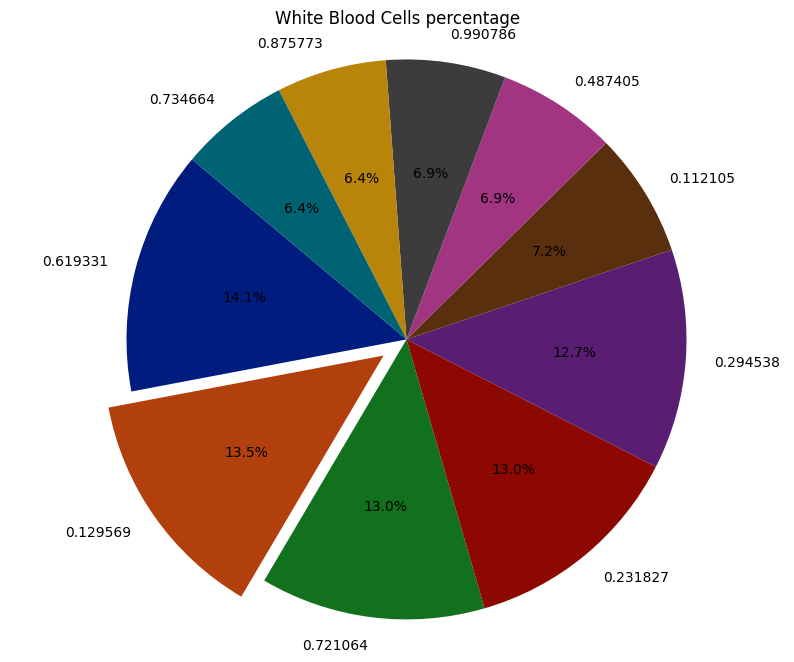

In [30]:
# Data to plot
plt.figure(figsize=(10,8))
labels = ['0.619331', '0.129569', '0.721064', '0.231827', '0.294538', '0.112105', '0.487405', '0.990786', '0.875773', '0.734664']
sizes = [51, 49, 47, 47, 46, 26, 25, 25, 23, 23]  # Percentage distribution

# Declaring exploding pie 
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # Ensure the explode list matches the size of your data

# Define Seaborn color palette to use
palette_color = sns.color_palette('dark')

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=palette_color, explode=explode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('White Blood Cells percentage')
plt.show()

<Axes: xlabel='Disease', ylabel='Cholesterol'>

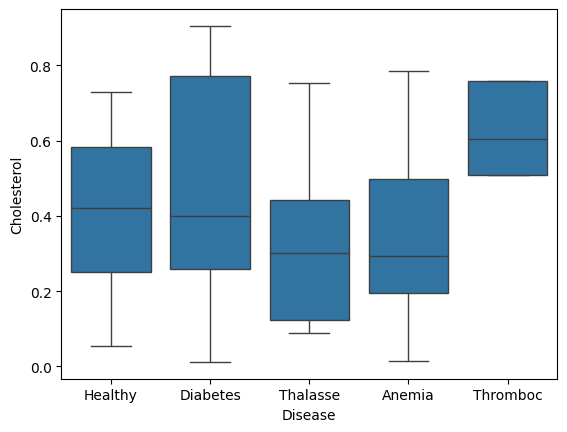

In [31]:
# Analyze relationships between features and target variable
sns.boxplot(x='Disease', y='Cholesterol', data=df)

# Correlation Metrix

                                            Glucose  Cholesterol  Hemoglobin  \
Glucose                                    1.000000     0.201850    0.126152   
Cholesterol                                0.201850     1.000000    0.207664   
Hemoglobin                                 0.126152     0.207664    1.000000   
Platelets                                  0.094962     0.014980    0.121879   
White Blood Cells                          0.032513     0.011045    0.059539   
Red Blood Cells                           -0.045155     0.121565    0.052803   
Hematocrit                                 0.166459     0.090864   -0.016702   
Mean Corpuscular Volume                   -0.000982    -0.074678   -0.130591   
Mean Corpuscular Hemoglobin               -0.155353    -0.299422    0.188262   
Mean Corpuscular Hemoglobin Concentration  0.053480     0.147722    0.052365   
Insulin                                    0.088715     0.134951   -0.167248   
BMI                                     

<Figure size 1500x800 with 0 Axes>

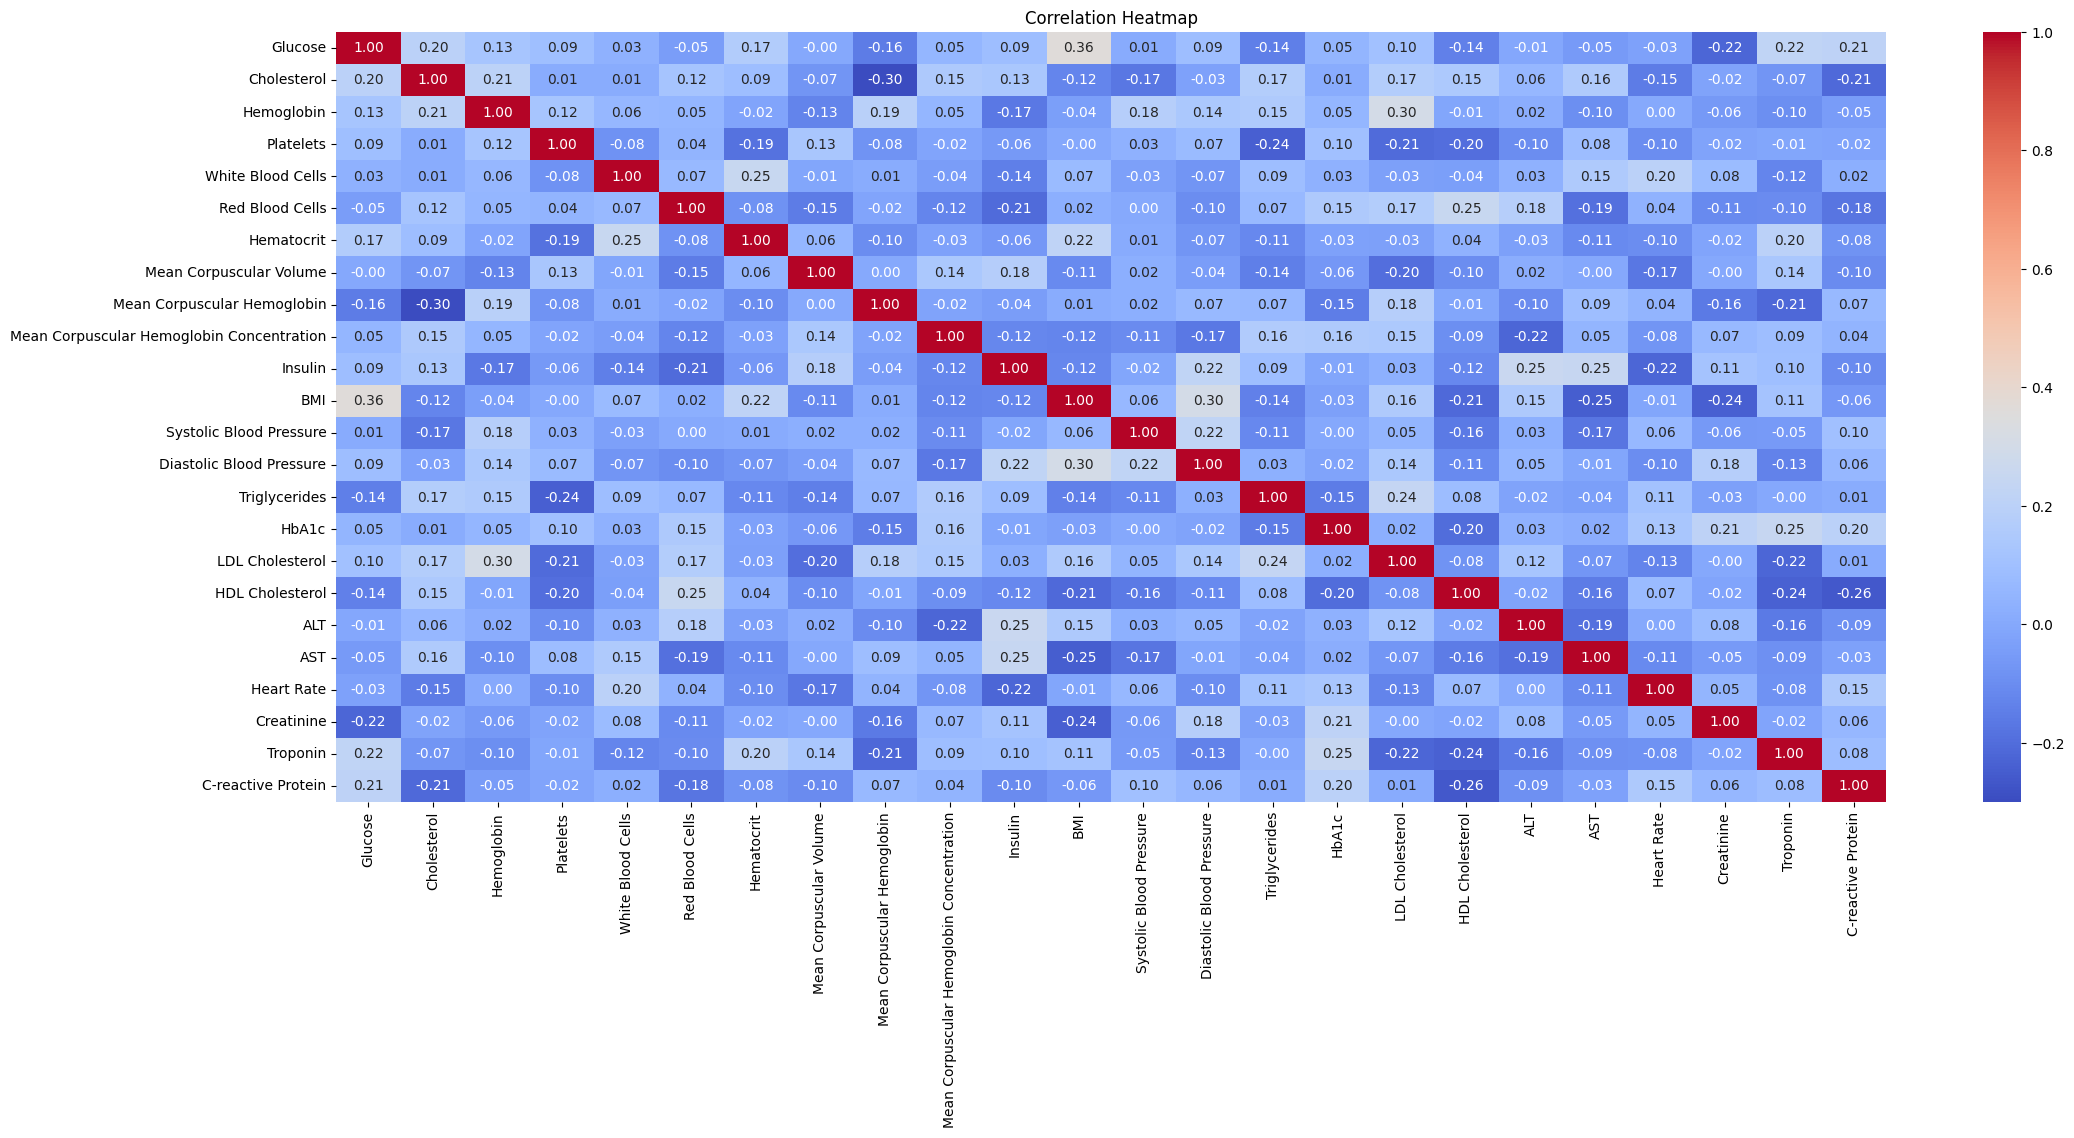

In [32]:
plt.figure(figsize=(15,8))
# Drop non-numeric columns if needed
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)

# Plotting heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# check strong positive and negative correlatiob:
1. Glucose has a correlation coefficient of 1 with itself (diagonal), indicating a perfect positive correlation (which is expected   since it's the same variable).
2. Glucose and Cholesterol have a correlation coefficient of 0.201850, indicating a weak positive correlation.
3. Glucose and Hemoglobin have a correlation coefficient of 0.126152, indicating a weak positive correlation.

1. Cholesterol has a correlation coefficient of 1 with itself (diagonal), indicating a perfect positive correlation (which is expected   since it's the same variable).
2. Cholesterol and Glucose have a correlation coefficient of 0.201850, indicating a weak positive correlation.
3. Cholesterol and Hemoglobin have a correlation coefficient of 0.207664, indicating a weak positive correlation.

1. Hemoglobin has a correlation coefficient of 1 with itself (diagonal), indicating a perfect positive correlation (which is expected   since it's the same variable).
2. Hemoglobin and Glucose have a correlation coefficient of 0.126152, indicating a weak positive correlation.
3. Hemoglobin and Cholesterol have a correlation coefficient of 0.207664, indicating a weak positive correlation.

1. C-reactive Protein has a correlation coefficient of 1 with itself (diagonal), indicating a perfect positive correlation (which is expected   since it's the same variable).
2. C-reactive Protein and Glucose have a correlation coefficient of 0.211177, indicating a weak positive correlation.

Given this dataset, the task is to build a machine learning model capable of predicting the likelihood of
an individual having a specific disease based on their health attributes. T

In [33]:
import pandas as pd

# Assuming you have a DataFrame called df with the 'disease' column
# and it contains values like ['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc']

# Define the specific disease you want to predict
target_Disease = 'Healthy'  # For example, let's consider 'Diabetes'

# Convert the 'disease' column into binary classification
df['Healthy'] = df['Disease'].apply(lambda x: 1 if x == target_Disease else 0)

# Drop the original 'disease' column if you no longer need it
# df.drop(columns=['Disease'], inplace=True)

In [34]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease,Healthy
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy,1
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes,0
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse,0
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia,0
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse,0


# # Encode categorical variable into numerical

In [35]:
from sklearn.preprocessing import LabelEncoder
disease_column = df['Disease']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the disease column and transform the values
encoded_disease = label_encoder.fit_transform(disease_column)

# Replace the original 'disease' column with the encoded values
df['Disease'] = encoded_disease

# Target Variable 

In [36]:
X = df.drop('Healthy', axis=1)
y = df['Healthy']

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization

In [38]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
MMS.fit_transform(X_train, y_train)

array([[0.41370373, 0.12610569, 1.        , ..., 0.31431275, 0.77869534,
        0.75      ],
       [0.19405694, 0.1716783 , 0.88124171, ..., 0.00496881, 0.79216888,
        0.75      ],
       [0.74303809, 0.32270857, 0.49463723, ..., 0.56192161, 0.04026574,
        0.75      ],
       ...,
       [0.13867601, 0.0867532 , 0.02472529, ..., 0.57887854, 0.94487462,
        0.75      ],
       [0.82276976, 0.43440593, 0.48534738, ..., 0.95953478, 0.82042123,
        0.25      ],
       [0.74303809, 0.32270857, 0.49463723, ..., 0.56192161, 0.04026574,
        0.75      ]])

# Model Evaluation

In [39]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Handling Imbalanced data

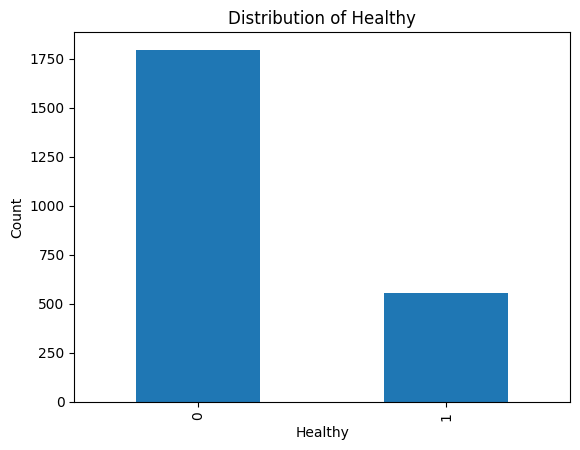

In [40]:
# Assuming df is your DataFrame
df['Healthy'].value_counts().plot(kind='bar')
plt.xlabel('Healthy')
plt.ylabel('Count')
plt.title('Distribution of Healthy')
plt.show()

# Imbalanced data with upsampling

Healthy
0    1795
1    1795
Name: count, dtype: int64


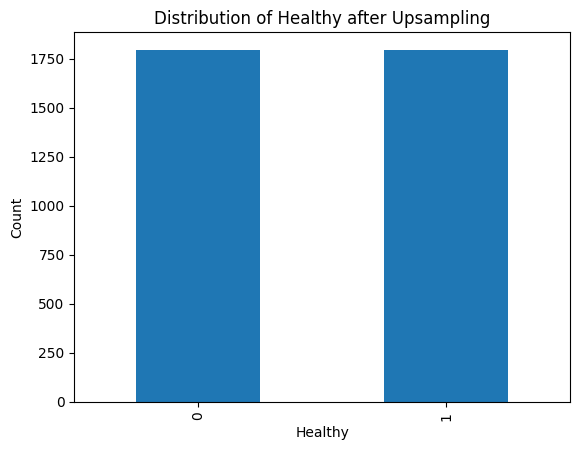

In [41]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Create the majority and minority classes
df_majority = df[df['Healthy'] == 0]
df_minority = df[df['Healthy'] == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled['Healthy'].value_counts())

# Plot the class distribution
df_upsampled['Healthy'].value_counts().plot(kind='bar')
plt.xlabel('Healthy')
plt.ylabel('Count')
plt.title('Distribution of Healthy after Upsampling')
plt.show()


# Suport vector machine

In [42]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       102

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

Accuracy: 1.0
Confusion Matrix:
[[369   0]
 [  0 102]]


# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       102

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

Accuracy: 1.0
Confusion Matrix:
[[369   0]
 [  0 102]]


# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

# Define class weights
class_weight = 'balanced'  # Automatically adjust class weights inversely proportional to class frequencies

# Initialize logistic regression model with class weights
log_reg = LogisticRegression(class_weight=class_weight)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       369
           1       0.94      1.00      0.97       102

    accuracy                           0.99       471
   macro avg       0.97      0.99      0.98       471
weighted avg       0.99      0.99      0.99       471

Accuracy: 0.9872611464968153
Confusion Matrix:
[[363   6]
 [  0 102]]


In [45]:
import pickle
# Lets dump our SVM model
pickle.dump(log_reg, open('app.pkl','wb'))

# Best MOdel

The optimal model is **Logistic Regression**, particularly when the data is balanced. This model not only delivers the best accuracy but also excels in recall and precision.